# Rock Quality Q compensation estimation #

In this notebook we practice Spectral ratio method to compute the Q comp value used in signal processing.

First we shall describe the data that we used.
### About dataset ###
The datasets are csv files, which contains spectum info.


### Content ###

The method assumes that the decay od aplitudes within a certen range are linear and the value can be extracted by the formula Q=(pi*(time2-time1))/gradient 


Where time1 and time2 are the time at the spectral's center and the gradient is the slope on the spectral ratio (estimated in the within the range of frequencies that show linearity).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
import csv
import matplotlib.pyplot as plt

In [2]:
def Qcomp_load(upper,lower):
    x_upper_spec=[]
    y_upper_spec=[]
    with open(upper) as up:
        spamreader=csv.reader(up)
        for i in spamreader:
            x_upper_spec.append(i[1])
            y_upper_spec.append(i[2])
    x_lower_spec=[]
    y_lower_spec=[]
    with open(lower) as dw:
        spamreader2=csv.reader(dw)
        for i in spamreader2:
            x_lower_spec.append(i[1])
            y_lower_spec.append(i[2])
    x_upper_spec=x_upper_spec[1:]
    y_upper_spec=y_upper_spec[1:]
    x_upper_spec=[ float(x) for x in x_upper_spec]
    y_upper_spec=[ float(x) for x in y_upper_spec]
    x_lower_spec=x_lower_spec[1:]
    y_lower_spec=y_lower_spec[1:]
    x_lower_spec=[ float(x) for x in x_lower_spec]
    y_lower_spec=[ float(x) for x in y_lower_spec]
    # rename var
    return(x_upper_spec,y_upper_spec,x_lower_spec,y_lower_spec)


In [10]:
def do_lin_fit(x,y,y2,t1,t2,r1,r2):
    diffd=[]
    for i in range(len(y)):
        diffd.append(y[i]-y2[i])
    xw=np.array(x).reshape(-1,1)
    yw=np.array(diffd).reshape(-1,1)
    # type of model
    model=LinearRegression(fit_intercept=True)
    # fitting model
    model.fit(xw[r1:r2],yw[r1:r2])
    xfit=np.linspace(r1,r2,(r2-r1+1))
    yfit=model.predict(xfit[:,np.newaxis])
    data=xfit*model.coef_[0]+model.intercept_
    plt.plot(xfit,data,label='gradient')
    plt.plot(x2,diffd,label='Spectral Ratio')
    plt.rcParams["figure.figsize"] = (20,10)

    plt.title("Spectral Ratio Method",fontsize=40)
    plt.ylabel("Amplitude dB",fontsize=20)
    plt.xlabel("frequency",fontsize=20)
    plt.legend()
    plt.show()
    print("model slope:       ", model.coef_[0])
    print("model intercept    ", model.intercept_)
    Q=(np.pi*(t2-t1))/model.coef_[0]
    print("Computed Q         ", Q)
    return Q
    

In [4]:
def plotty(x,y,x2,y2):
    fig, ax=plt.subplots(1,1)
    diffd=[]
    for i in range(len(y)):
        diffd.append(y[i]-y2[i])
    plt.plot(x,y, label='Upper Spectra')
    plt.plot(x2,y2, label='Lower Spectra' )
    plt.plot(x2,diffd ,label='Spectral Ratio')
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Spectra",fontsize=40)
    plt.ylabel("Amplitude dB",fontsize=20)
    plt.xlabel("frequency",fontsize=20)
    plt.legend(fontsize=20)
    plt.yticks(range(0, 10,1))
    plt.show()

In [5]:
x,y,x2,y2=Qcomp_load('upper_spec.csv','lower_spec.csv')

Now plot the spectra and plot the ratio


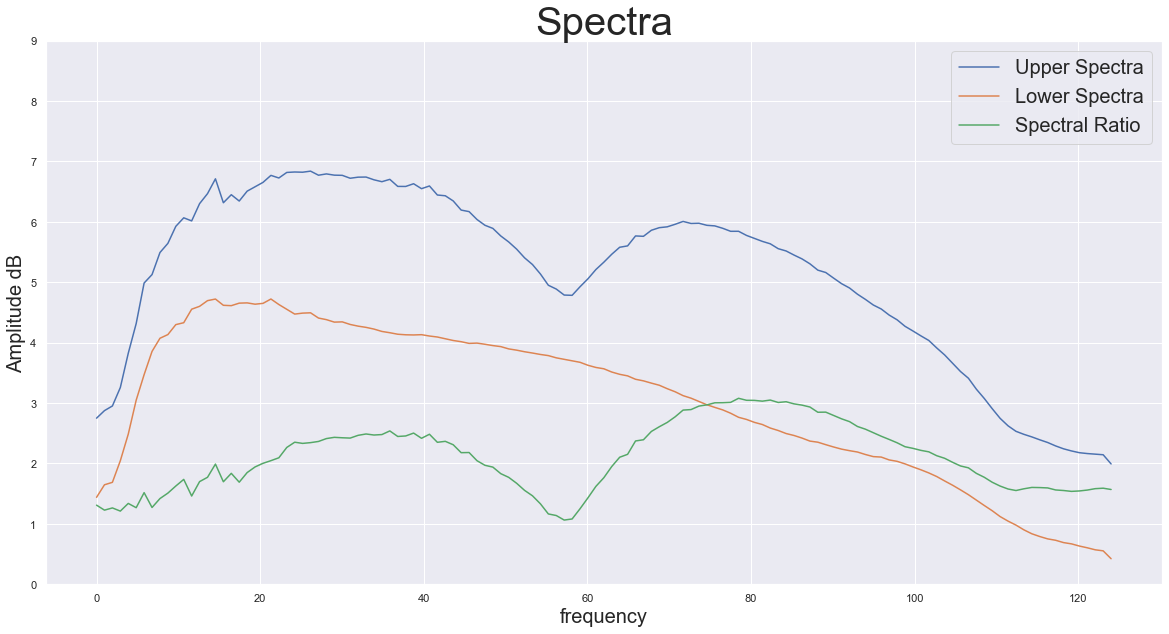

In [8]:
plotty(x,y,x2,y2)

once defined the portion to use for spectral ratio method calculate the Q
we need:
    -time of the spectra (center)
    -range of frequency for the spectral ratio method

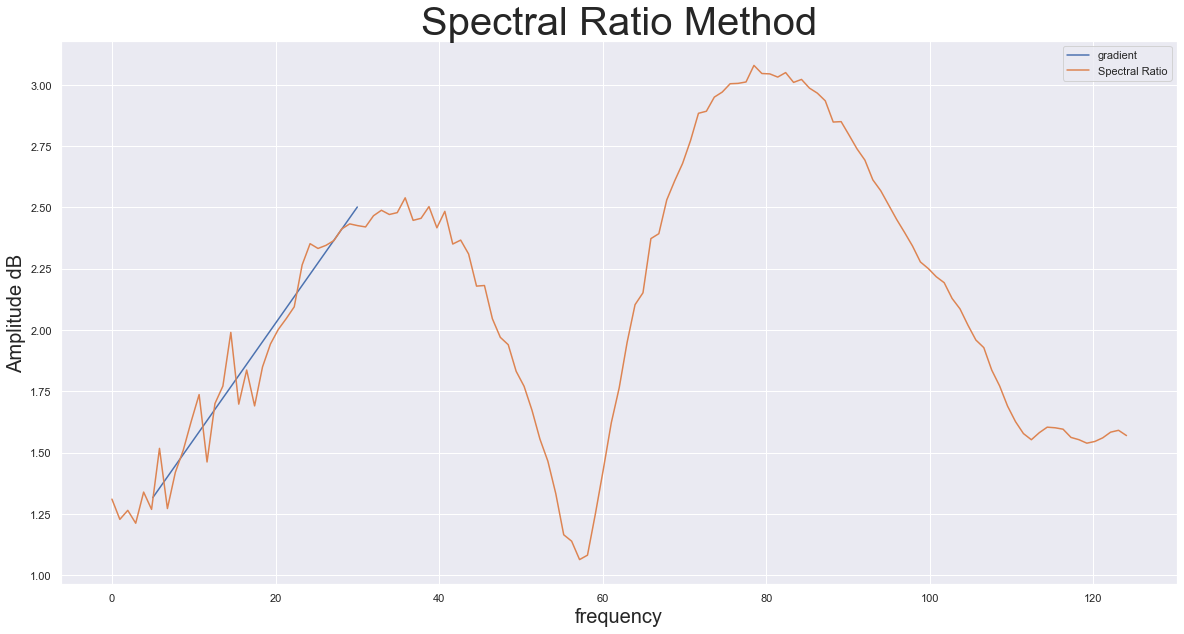

model slope:        [0.04742057]
model intercept     [1.07933006]
Computed Q          [132.49914157]


In [11]:
Q=(do_lin_fit(x,y,y2,1.000,3.000,5,30))